# Introduction to Data Science 
# Lecture 13: Linear Regression 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll discuss:
* overfitting, model generalizability, and the bias-variance tradeoff
* cross validation 
* using categorical variables for regression  

Recommended reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 3 [digitial version available here](http://www-bcf.usc.edu/~gareth/ISL/)


## Review from Lecture 9 (Linear Regression 1)

### Simple Linear Regression (SLR)

**Data**: We have $n$ samples $(x, y)_i$, $i=1,\ldots n$. 

**Model**: $y \sim \beta_0 + \beta_1 x$ 

**Goal**: Find the best values of $\beta_0$ and $\beta_1$, denoted $\hat{\beta}_0$ and $\hat{\beta}_1$, so that the prediction $y = \hat{\beta}_0 + \hat{\beta}_1 x$ "best fits" the data. 

<img src="438px-Linear_regression.png" width="40%" alt="https://en.wikipedia.org/wiki/Linear_regression">

**Theorem.** 
The parameters that minimize the "residual sum of squares (RSS)", 
$RSS = \sum_i (y_i - \beta_0 - \beta_1 x_i)^2$, 
are: 
$$
\hat{\beta}_1 = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y}) }{\sum_{i=1}^n (x_i - \overline{x})^2}
\qquad \textrm{and} \qquad
\hat{\beta}_0 = \overline{y} -  \hat{\beta}_1 \overline{x}. 
$$
where $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i$ and $\overline{y} = \frac{1}{n} \sum_{i=1}^n y_i$. 


### Multilinear regression 

**Data**: We have $n$ samples of the form $\big(x_1, x_2 , \ldots, x_m , y \big)_i$, $i=1,\ldots n$. 

**Model**: $y \sim \beta_0 + \beta_1 x_1 + \cdots + \beta_m x_m $ 

### Nonlinear relationships  

**Data**: We have $n$ samples $\big(x_1, x_2 , \ldots, x_m , y \big)_i$, $i=1,\ldots n$. 

**Model**: $y \sim \beta_0 + \beta_1 f_1(x_1,x_2,\ldots,x_m) + \cdots +  \beta_k f_k(x_1,x_2,\ldots,x_m)$ 


## Regression with python

There are several different python packages that do regression:
1. [statsmodels](http://statsmodels.sourceforge.net/)
+ [scikit-learn](http://scikit-learn.org/)
+ [SciPy](http://www.scipy.org/)
+ ... 

Last time, I commented that statsmodels approaches regression from a statistics viewpoint, while scikit-learn approaches from a machine learning viewpoint. I'll say more about this today. 

SciPy has some regression tools, but compared to these other two packages, they are relatively limited. 


In [1]:
# imports and setup

import scipy as sc

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Advertisement dataset
Consider the 'Advertising' dataset from
[here](http://www-bcf.usc.edu/~gareth/ISL/data.html).


For 200 different ‘markets’ (think different cities), this dataset consists of the number of sales of a particular product as well as the advertising budget for three different media: TV, radio, and newspaper. 

Last time, after trying a variety of linear models, we discovered the following one, which includes a nonlinear relationship between the TV budget and Radio budget:
$$
\text{Sales} = \beta_0 + \beta_1 * \text{TV_budget} + \beta_2*\text{Radio_budget} + \beta_3 * \text{TV_budget} *\text{Radio_budget}. 
$$

In [2]:
advert = pd.read_csv('Advertising.csv',index_col=0) #load data

ad_NL = sm.ols(formula="Sales ~ TV + Radio + TV*Radio", data=advert).fit()
ad_NL.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          6.68e-146
Time:                        14:25:03   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model is really excellent: 
- $R^2 = 97\%$ of the variability in the data is accounted for by the model. 
- The $p$-value for the F-statistic is very small 
- The $p$-values for the individual coefficients are small 

Interpretation: 
- In a particular market, if I spend an additional $1k on TV advertising, what do I expect sales to do? 
- Should I spend additional money on TV or Radio advertising? 

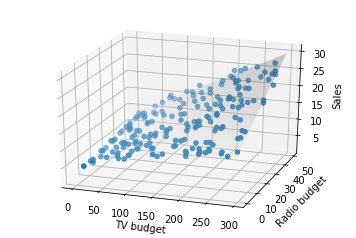

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=advert['TV'], ys=advert['Radio'], zs=advert['Sales'])

x = sc.linspace(advert['TV'].min(), advert['TV'].max(), 100)
y = sc.linspace(advert['Radio'].min(), advert['Radio'].max(), 100)
X,Y = sc.meshgrid(x,y)
par = dict(ad_NL.params)
Z = par["Intercept"] + par["TV"]*X + par["Radio"]*Y + par["TV:Radio"]*X*Y
surf = ax.plot_surface(X, Y, Z,cmap=cm.Greys, alpha=0.2)

ax.view_init(25,-71)

ax.set_xlabel('TV budget')
ax.set_ylabel('Radio budget')
ax.set_zlabel('Sales')

plt.show()

### A word of caution on overfitting

It is tempting to include a lot of terms in the regression, but this is problematic. A useful model will  *generalize* beyond the data given to it. 


**Questions?**

## Overfitting, underfitting, model generalizability, and the bias–variance tradeoff

In regression, and other prediction problems, we would like to develop a model on a dataset, that would preform well, not only on that dataset, but on similar data that the model hasn't yet seen by the model. If a model satisfies this criterion, we say that it is *generalizable*. 

Consider the following data, that has been fit with a linear polynomial model (black) and a high degree polynomial model (blue). For convenience, let me call these the black and blue models, respectively. 

<img src="overfitted_data.png" title="https://commons.wikimedia.org/w/index.php?curid=47471056" width="40%">

Let's call the dataset that we train the model on the *training dataset* and the dataset that we test the model on the *testing dataset*. In the above figure, the training dataset are the black points and the testing dataset is not shown, but we imagine it to be similar to the points shown. 

Which model is better? 

The blue model has 100% accuracy on the training dataset, while the black model has much smaller accuracy. However, the blue model is highly oscillatory and might not generalize well to new data. For example, the model would wildly miss the test point $(3,0)$. We say that the blue model has *overfit* the data. On the other hand, it isn't difficult to see that we could also *underfit* the data. In this case, the model isn't complex enough to have good accuracy on the training dataset. 

This phenomena is often described in terms of the *bias-variance tradeoff*. Here, we decompose the error of the model into three terms:
$$
\textrm{Error} = 
\textrm{Bias} + 
\textrm{Variance} + 
\textrm{Irreducible Error}. 
$$
- The *bias* of the method is the error caused by the simplifying assumptions built into the method. 
+ The *variance* of the method is how much the model will change based on the sampled data. 
+ The *irreducible error* is error in the data itself, so no model can capture this error. 

There is a tradeoff between the bias and variance of a model. 
High-variance methods (e.g., the blue method) are accurate on the training set, but overfit noise in the data, so don't generalized well to new data. High-bias models (e.g., the black method) are too simple to fit the data, but are better at generalizing to new test data. 


## Generalizability in practice

Consider the Auto dataset, which contains 9 features (mpg, cylinders, displacement, horsepower, weight, acceleration, year, origin, name) for 397 different used cars. This dataset is available digitally [here](http://www-bcf.usc.edu/~gareth/ISL/).

In [4]:
auto = pd.read_csv('Auto.csv') #load data

# one of the horsepowers is '?', so we just remove it and then map the remaining strings to integers
auto = auto[auto.horsepower != '?']
auto['horsepower'] = auto['horsepower'].map(int)

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
print(auto.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

Let's consider the relationship between mpg and horsepower.

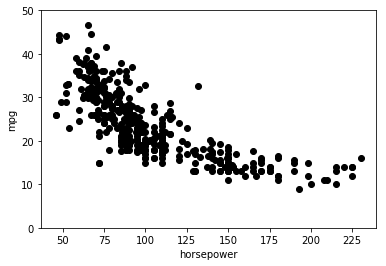

In [6]:
plt.scatter(auto['horsepower'],auto['mpg'],color='black',linewidth=1)
plt.xlabel('horsepower'); plt.ylabel('mpg')
plt.ylim((0,50))
plt.show()

We consider the linear model
$$
\text{mpg} = \beta_0 + \beta_1 \text{horsepower} + \beta_2 \text{horsepower}^2 + \cdots + \beta_m \text{horsepower}^m
$$
It might seem that choosing $m$ to be large would be a good thing. After all, a high degree polynomial is more flexible than a small degree polynomial. 

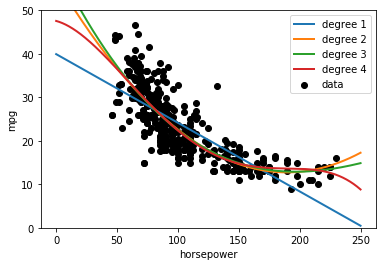

In [7]:
# fit polynomial models
mr1 = sm.ols(formula="mpg ~ horsepower", data=auto).fit()
par1 = dict(mr1.params)
mr2 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0)", data=auto).fit()
par2 = dict(mr2.params)
mr3 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0)", data=auto).fit()
par3 = dict(mr3.params)
mr4 = sm.ols(formula="mpg ~ horsepower + I(horsepower ** 2.0) + I(horsepower ** 3.0) + I(horsepower ** 4.0)", data=auto).fit()
par4 = dict(mr4.params)

plt.scatter(auto['horsepower'],auto['mpg'],color='black',label="data")

x = sc.linspace(0,250,1000)
y1 = par1["Intercept"] + par1['horsepower']*x
y2 = par2["Intercept"] + par2['horsepower']*x + par2['I(horsepower ** 2.0)']*x**2
y3 = par3["Intercept"] + par3['horsepower']*x + par3['I(horsepower ** 2.0)']*x**2 + par3['I(horsepower ** 3.0)']*x**3
y4 = par4["Intercept"] + par4['horsepower']*x + par4['I(horsepower ** 2.0)']*x**2 + par4['I(horsepower ** 3.0)']*x**3 + par4['I(horsepower ** 4.0)']*x**4

plt.plot(x,y1,label="degree 1",linewidth=2)
plt.plot(x,y2,label="degree 2",linewidth=2)
plt.plot(x,y3,label="degree 3",linewidth=2)
plt.plot(x,y4,label="degree 4",linewidth=2)
plt.legend()
plt.xlabel('horsepower'); plt.ylabel('mpg')
plt.ylim((0,50))
plt.show()

In [8]:
print('mr1:',mr1.rsquared)
print('mr2:',mr2.rsquared)
print('mr3:',mr3.rsquared)
print('mr4:',mr4.rsquared)

mr1: 0.605948257889
mr2: 0.687559030513
mr3: 0.688213693126
mr4: 0.689343605493


As $m$ increases, the $R^2$ value is becoming larger. (You can prove that this is always true if you add more predictors.)

Let's check the $p$-values for the coefficients for the degree 4 fit.

In [9]:
mr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           5.40e-99
Time:                        14:25:04   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               56.9001      1.800     31.604      0.000      53.360      60.440
horsepower              -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2.0)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For $m>2$, the $p$-values are very large, so we don't have a strong relationship between the variables. 

We could rely on *Occam's razor* to decide between models. Occam's razor can be stated: among many different models that explain the data, the simplest one should be used. Since we don't get much benefit in terms of $R^2$ values by choosing $m>2$, we should use $m=2$. 

But there are even better criterion for deciding between models. 

## Cross-validation

There is a clever method for developing generalizable models that aren't underfit or overfit, called *cross validation*. 

**Cross-validation** is a general method for assessing how the results of a predictive model (regression, classification,...) will *generalize* to an independent data set. In regression, cross-validation is a method for assessing how well the regression model will predict the dependent value for points that weren't used to *train* the model. 

The idea of the method is simple: 
1. Split the dataset into two groups: the training dataset and the testing dataset. 
+ Train a variety of models on the training dataset. 
+ Check the accuracy of each model on the testing dataset. 
+ By comparing these accuracies, determine which model is best.

In practice, you have to decide how to split the data into groups (i.e. how large the groups should be). You might also want to repeat the experiment so that the assessment doesn't depend on the way in which you split the data into groups. We'll worry about these questions in a later lecture.

As the model becomes more complex ($m$ increases), the accuracy always increases for the training dataset. But, at some point, it starts to overfit the data and the accuracy decreases for the test dataset! Cross validation techniques will allow us to find the sweet-spot for the parameter $m$! (Think: Goldilocks and the Three Bears.)

Let's see this concept for the relationship between mpg and horsepower in the Auto dataset. We'll use the scikit-learn package for the cross validation analysis instead of statsmodels, because it is much easier to do cross validation there. 

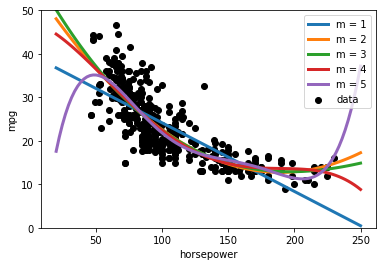

In [10]:
lr = linear_model.LinearRegression() # create a linear regression object

# with scikit-learn, we have to extract values from the pandas dataframe
for m in sc.arange(2,6): 
    auto['h'+str(m)] = auto['horsepower']**m

X = auto[['horsepower','h2','h3','h4','h5']].values.reshape(auto['horsepower'].shape[0],5)
y = auto['mpg'].values.reshape(auto['mpg'].shape[0],1)

plt.scatter(X[:,0], y,  color='black',label='data')

# make data for plotting
xs = sc.linspace(20, 250, num=100)
Xs = sc.zeros([100,5])
Xs[:,0] = xs
for m in sc.arange(1,5): 
    Xs[:,m] = xs**(m+1)
    
for m in sc.arange(1,6):     
    lr.fit(X=X[:,:m], y=y)
    plt.plot(xs, lr.predict(X=Xs[:,:m]), linewidth=3, label = "m = " + str(m) )

plt.legend(loc='upper right')
plt.xlabel('horsepower'); plt.ylabel('mpg')
plt.ylim((0,50))
plt.show()

### Cross validation using scikit-learn 

- In scikit-learn, you can use the [*train_test_split*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split the dataset into a training dataset and a test dataset.
+ The *score* function returns the coefficient of determination, $R^2$, of the prediction.

In the following code, I've split the data in an unusual way - taking the test set to be 90% - to illustrate the point more clearly. Typically, we might make the training set to be 90% of the dataset. 

(39, 5) (39, 1)
(353, 5) (353, 1)
m= 1 , train:  0.650811755769  test:  0.586108920435
m= 2 , train:  0.778872610343  test:  0.677342696688
m= 3 , train:  0.780900786774  test:  0.673081906981
m= 4 , train:  0.781827554849  test:  0.671507142062
m= 5 , train:  0.784984629095  test:  0.652224573159


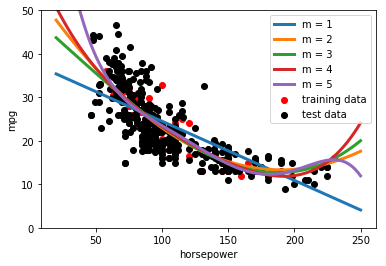

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

plt.scatter(X_train[:,0], y_train,  color='red',label='training data')
plt.scatter(X_test[:,0], y_test,  color='black',label='test data')

for m in sc.arange(1,6):     
    lr.fit(X=X_train[:,:m], y=y_train)
    print('m=', m, ', train: ', lr.score(X_train[:,:m], y_train), ' test: ', lr.score(X_test[:,:m], y_test))
    plt.plot(xs, lr.predict(X=Xs[:,:m]), linewidth=3, label = "m = " + str(m) )

plt.legend()
plt.xlabel('horsepower'); plt.ylabel('mpg')
plt.ylim((0,50))
plt.show()


We observe that as the model complexity increases, 
- the accuracy on the training data increases, but 
+ the generalizability of the model to the test set decreases. 

Our job as data analysts is to find a model that is sufficiently complex to describe the training data, but not so complex that it isn't generalizable to new data. 

## Class exercise: analysis of the credit dataset 

Next, we'll use [Statsmodels](http://statsmodels.sourceforge.net/) to study a dataset related to credit cards.
We'll use the 'Credit' dataset, available 
[here](http://www-bcf.usc.edu/~gareth/ISL/data.html). 
This dataset consists of some credit card information for 400 people. 

Of course, a *credit card* is a card issued to a person ("cardholder"), typically from a bank, that can be used as a method of payment. The card allows the cardholder to borrow money from the bank to pay for goods and services. Credit cards have a *limit*, the maximum amount you can borrow, which is determined by the bank. The limit is determined from information collected from the cardholder (income, age, ...) and especially (as we will see) the cardholders "credit rating".  The *credit rating* is an evaluation of the (1) ability of the cardholder to pay back the borrowed money and (2) the likelihood of the cardholder to defaulting on the borrowed money. 

Our focus will be on the use of regression tools to study this dataset. Ideally, we'd like to understand what factors determine *credit ratings* and *credit limits*. We can think about this either from the point of view of (1) a bank who wants to protect their investments by minimizing credit defaults or (2) a person who is trying to increase their credit rating and/or credit limit. 

A difficulty we'll encounter is including categorical data in regression models.  

In [12]:
# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
7,20.996,3388,259,2,37,12,Female,No,No,African American,203
8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [13]:
# Summarize and describe data

print(credit.dtypes, '\n') 
print(credit['Gender'].value_counts(), '\n')
print(credit['Student'].value_counts(), '\n')
print(credit['Married'].value_counts(), '\n')
print(credit['Ethnicity'].value_counts())
credit.describe()

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object 

Female    207
 Male     193
Name: Gender, dtype: int64 

No     360
Yes     40
Name: Student, dtype: int64 

Yes    245
No     155
Name: Married, dtype: int64 

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


The column names of this data are:  
1. Income 
+ Limit  
+ Rating  
+ Cards
+ Age  
+ Education  
+ Gender (categorial: M,F)
+ Student (categorial: Y,N)
+ Married (categorial: Y,N)
+ Ethnicity (categorial: Caucasian, Asian, African American) 
+ Balance

**Question:** What is wrong with the income data? How can it be fixed? 

The file 'Credit.csv' is a comma separated file. I assume a period was used instead of a comma to indicate thousands in income so it wouldn't get confused with the separating value? Or maybe this is a dataset from Europe? Or maybe the income is just measured in \$1k units?  To change the income data, we can use the Pandas series 'map' function. 


In [14]:
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
print(credit[:10])

      Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
1    14891.0   3606     283      2   34         11    Male      No     Yes   
2   106025.0   6645     483      3   82         15  Female     Yes     Yes   
3   104593.0   7075     514      4   71         11    Male      No      No   
4   148924.0   9504     681      3   36         11  Female      No      No   
5    55882.0   4897     357      2   68         16    Male      No     Yes   
6    80180.0   8047     569      4   77         10    Male      No      No   
7    20996.0   3388     259      2   37         12  Female      No      No   
8    71408.0   7114     512      2   87          9    Male      No      No   
9    15125.0   3300     266      5   66         13  Female      No      No   
10   71061.0   6819     491      3   41         19  Female     Yes     Yes   

           Ethnicity  Balance  
1          Caucasian      333  
2              Asian      903  
3              Asian      580  
4            

We can also look at the covariances in the data. (This is how the variables vary together.) There are two ways to do this:
1. Quantitatively: Compute the correlation matrix. For each pair of variables, $(x_i,y_i)$, we compute 
$$
\frac{\sum_i (x_i - \bar x) (y_i - \bar y)}{s_x s_y}
$$ 
where $\bar x, \bar y$ are sample means and $s_x, s_y$ are sample variances. 
+ Visually: Make a scatter matrix of the data


In [15]:
credit.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


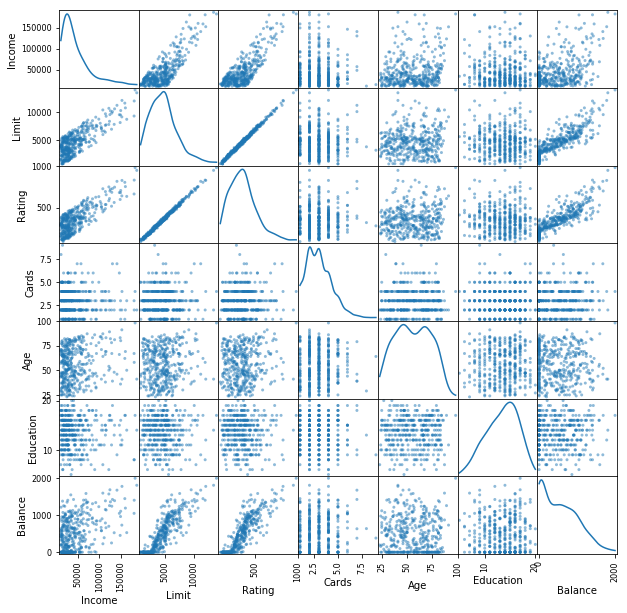

In [16]:
# trick: semi-colon prevents output
pd.plotting.scatter_matrix(credit, figsize=(10, 10), diagonal='kde');


**Observations:**
1. Limit and Rating are highly correlated ($99.7\%$)  
+ Income strongly correlates with Limit ($79\%$) and Rating ($79\%$)
+ Balance correlates with Limit ($86\%$) and Rating ($86\%$)
+ There are "weird stripes" in some of the data. Why? 
+ Categorical information doesn't appear in this plot. Why? How can I visualize the categorical variables?

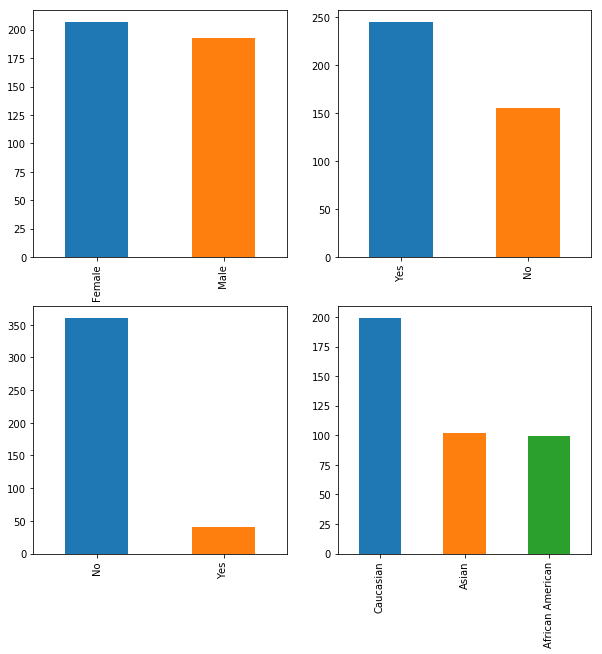

In [17]:
# Plot Categorical variables: Gender, Student, Married, Ethnicity

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
credit["Gender"].value_counts().plot(kind='bar',ax=axes[0,0]);
credit["Student"].value_counts().plot(kind='bar',ax=axes[1,0]);
credit["Married"].value_counts().plot(kind='bar',ax=axes[0,1]);
credit["Ethnicity"].value_counts().plot(kind='bar',ax=axes[1,1]);

## A first regression model

**Exercise:** First regress Limit on Rating: 
$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}. 
$$
Since credit ratings are primarily used by banks to determine credit limits, we expect that Rating is very predictive for Limit, so this regression should be very good. 

Use the 'ols' function from the statsmodels python library. 


In [18]:
# your code goes here

credit_model = sm.ols(formula="Limit ~ Rating", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Tue, 18 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:25:09   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting Limit without Rating 

Since Rating and Limit are almost the same variable, next we'll forget about Rating and just try to predict Limit from the real-valued variables (non-categorical variables): Income, Cards, Age, Education, Balance. 

**Exercise:** Develop a multilinear regression model to predict Rating. Interpret the results. 

For now, just focus on the real-valued variables (Income, Cards, Age, Education, Balance)
and ignore the categorical variables (Gender, Student, Married, Ethnicity). 



In [19]:
# your code goes here 

credit_model = sm.ols(formula="Limit ~ Income + Balance", data=credit).fit()
credit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          1.37e-241
Time:                        14:25:09   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Income         0.0327      0.001     35.691      0.000       0.031       0.035
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Which independent variables are good/bad predictors? 


**Your Observations:**

**Solution Observations:**
1. Income and balance are best predictors
+ Including other variables (Cards, Age, Education) doesn't increase $R^2$ by much. 

## Incorporating categorical variables into regression models

We have four categorical variables (Gender, Student, Married, Ethnicity). How can we include them in a regression model? 

Let's start with a categorical variable with only 2 categories: Gender (Male, Female).

Idea: Create a "dummy variable" that turns Gender into a real value: 
$$
\text{Gender_num}_i = \begin{cases} 
1 & \text{if $i$-th person is female} \\
0 & \text{if $i$-th person is male}
\end{cases}. 
$$
Then we could try to fit a model of the form
$$
\text{Income} = \beta_0 + \beta_1 \text{Gender_num}. 
$$

In [20]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

credit_model = sm.ols(formula="Income ~ Gender_num", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04589
Date:                Tue, 18 Feb 2020   Prob (F-statistic):              0.830
Time:                        14:25:09   Log-Likelihood:                -4755.1
No. Observations:                 400   AIC:                             9514.
Df Residuals:                     398   BIC:                             9522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.561e+04   2539.977     17.957      0.000    4.06e+04    5.06e+04
Gender_num  -756.3885   3530.812     -0.214      0.830   -7697.761    6184.984
==============================================================================
Omnibus:                      137.942   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              341.093
Skew:                           1.735   Prob(JB):                     8.56e-75
Kurtosis:                       5.902   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the $p$-value for the Gender_num coefficient is very large, there is no support for the conclusion that there is a difference in credit card balance between genders.

**Exercise**: Try to find a meaningful relationship in the data including one of the categorical variables (Gender, Student, Married), for example, Balance vs. Student, Credit vs. Married, etc... 


In [21]:
# your code here 

credit_model = sm.ols(formula="Limit ~ Income + Balance ", data=credit).fit()
credit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Tue, 18 Feb 2020   Prob (F-statistic):          1.37e-241
Time:                        14:25:09   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Income         0.0327      0.001     35.691      0.000       0.031       0.035
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## What about a categorical variable with 3 categories? 

The Ethnicity variable takes three values: Caucasian, Asian, and African American. 

What's wrong with the following?  
$$
\text{Ethnicity_num}_i = \begin{cases} 
0 & \text{if $i$-th person is Caucasian} \\
1 & \text{if $i$-th person is Asian} \\ 
2 & \text{if $i$-th person is African American}
\end{cases}. 
$$

Hint: Recall Nominal, Ordinal, Interval, Ratio variable types from Lecture 4 (Descriptive Statistics).

We'll need more than one dummy variable:  
$$
\text{Asian}_i = \begin{cases} 
1 & \text{if $i$-th person is Asian} \\
0 & \text{otherwise}
\end{cases}. 
$$
$$
\text{Caucasian}_i = \begin{cases} 
1 & \text{if $i$-th person is Caucasian} \\
0 & \text{otherwise}
\end{cases}. 
$$
The value with no dummy variable--African American--is called the *baseline*.

We can use the *get_dummies* function to automatically get these values

In [22]:
dummy = pd.get_dummies(credit['Ethnicity'])
credit = pd.concat([credit,dummy],axis=1)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Gender_num,Student_num,Married_num,African American,Asian,Caucasian
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,0,0,1
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,1,1,0,1,0
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580,0,0,0,0,1,0
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,0,1,0
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,0,0,1
6,80180.0,8047,569,4,77,10,Male,No,No,Caucasian,1151,0,0,0,0,0,1
7,20996.0,3388,259,2,37,12,Female,No,No,African American,203,1,0,0,1,0,0
8,71408.0,7114,512,2,87,9,Male,No,No,Asian,872,0,0,0,0,1,0
9,15125.0,3300,266,5,66,13,Female,No,No,Caucasian,279,1,0,0,0,0,1
10,71061.0,6819,491,3,41,19,Female,Yes,Yes,African American,1350,1,1,1,1,0,0


**Exercise**: Can you find a relationship in the data involving the variable ethnicity? 

In [23]:
# your code here 


![image](https://imgs.xkcd.com/comics/error_bars_2x.png)
